# Observations and Insights

### Imports and Read Files

#### Imports 

In [447]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np


#### Read Files

In [448]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


### Table's of given Data

#### Mouse Metadata Table

In [449]:
# Table Outcome
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


#### Study Results Table

In [450]:
# Table Outcome
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


#### Merged 'Mouse Metadata' & 'Study Results' Table

In [451]:
# Merge two dataframes using an inner join
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


#### Data information on given data

In [452]:
# Printing out the columns of 'merge_df' data frame
mm = list(mouse_metadata)
print(f"Data from 'mouse_metadata'...{mm}")
print("These values do not change... DO NOT TOUCH OR CHANGE VALUES")

print(" - " * 10)
sr = list(study_results)
print(f"Data from 'study_results'...{sr}")
print("These values do change... APPLY ARGUEMENTS TO VALUES")


Data from 'mouse_metadata'...['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
These values do not change... DO NOT TOUCH OR CHANGE VALUES
 -  -  -  -  -  -  -  -  -  - 
Data from 'study_results'...['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']
These values do change... APPLY ARGUEMENTS TO VALUES


### Amount of Mice in the data

In [453]:
mice_count = merge_df

# Add Column to 'mice_count' since we need two 'Mouse ID'... one for count and the other is for index
# Also... cannot have two same names... 'Mouse ID' and 'Mouse ID' cannot work together in '.agg' formula
mice_count.loc[:, "Total of Studies"] = merge_df["Mouse ID"]

# Fource 'Mouse ID' as index and keep column of 'Total of Mice' while we count the amount of 'Total of Mices' by its 'Mouse ID'
# if it has a same 'Mouse ID', it will count into that index...
mice_count = mice_count.groupby(['Mouse ID'], as_index=False).agg({'Total of Studies': 'count'})

# Get the value of how many mices there are by counting 'Mouse ID'
mice_number = mice_count["Mouse ID"].count()
print(f"There are {mice_number} mice in the data.")

There are 249 mice in the data.


### Clean Merged Table

In [454]:
mice_agg = merge_df

# Add Column to 'mice_count' since we need two 'Mouse ID'... one for count and the other is for index
# Also... cannot have two same names... 'Mouse ID' and 'Mouse ID' cannot work together in '.agg' formula
mice_agg.loc[:, "Total of Mice"] = merge_df["Mouse ID"]

# Fource 'Mouse ID' as index and keep column of 'Total of Mice' while we count the amount of 'Total of Mices' by its 'Mouse ID'
# if it has a same 'Mouse ID', it will count into that index...
mice_agg = mice_agg.groupby(['Mouse ID'], as_index=False).agg({
    'Total of Studies': 'count',
    'Timepoint':'sum',
    'Tumor Volume (mm3)':'mean',
    'Metastatic Sites':'sum'})

# Add Column to 'mice_count' since these are columns with values that cannot change
mice_agg.loc[:, "Drug Regimen"] = merge_df["Drug Regimen"]
mice_agg.loc[:, "Sex"] = merge_df["Sex"]
mice_agg.loc[:, "Age (Months)"] = merge_df["Age_months"]
mice_agg.loc[:, "Weight (g)"] = merge_df["Weight (g)"]

# Convert 'Age' into 'Total Count'
mice_agg = mice_agg.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Average (mm3)"})
mice_agg = mice_agg.rename(columns={"Timepoint": "Timepoint Total"})
mice_agg = mice_agg.rename(columns={"Metastatic Sites": "Metastatic Sites Total"})

mice_agg

,Mouse ID,Total of Studies,Timepoint Total,Tumor Volume Average (mm3),Metastatic Sites Total,Drug Regimen,Sex,Age (Months),Weight (g)
0,a203,10,225,56.312708,11,Ramicane,Male,21,16
1,a251,10,225,55.237095,8,Ramicane,Male,21,16
2,a262,10,225,58.611631,23,Ramicane,Male,21,16
3,a275,10,225,52.770965,12,Ramicane,Male,21,16
4,a366,7,105,54.639906,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...,...
244,z435,3,15,46.942214,0,Capomulin,Male,3,19
245,z578,10,225,38.411510,0,Ramicane,Female,8,20
246,z581,10,225,53.979584,20,Ramicane,Female,8,20
247,z795,10,225,54.880317,14,Ramicane,Female,8,20


### Input Mouse ID and Specific Mouse Table Output

#### Input Code

In [455]:
# Example of what we want by having user input the value of the mouse
mouse_id_grouped_by = mice_agg.set_index('Mouse ID')
mouse_id_grouped_by.loc[['a203']]


,Total of Studies,Timepoint Total,Tumor Volume Average (mm3),Metastatic Sites Total,Drug Regimen,Sex,Age (Months),Weight (g)
Mouse ID,,,,,,,,
a203,10,225,56.312708,11,Ramicane,Male,21,16


#### Printing index list of mice names ('Mouse ID' values)

In [456]:
# Get the index/rows of the above DataFrame 
# Using tolist() function
print("\nThis is index of DataFrame:\n")
index_list = mouse_id_grouped_by.index.tolist()
print(index_list)


This is index of DataFrame:

['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700', 'l725', 'l733', 'l872', 'l897', 'm133', 'm269', 'm331', 'm546', '

In [457]:
# User Input on what mice they want...
print("Here is a list of mouse id's")
print(" - " * 10)
print("'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700', 'l725', 'l733', 'l872', 'l897', 'm133', 'm269', 'm331', 'm546', 'm550', 'm601', 'm650', 'm756', 'm957', 'n304', 'n364', 'n482', 'n630', 'n671', 'n678', 'n763', 'n923', 'n967', 'o287', 'o302', 'o331', 'o523', 'o562', 'o725', 'o795', 'o809', 'o813', 'o848', 'o926', 'o973', 'p136', 'p189', 'p310', 'p387', 'p438', 'p981', 'q119', 'q132', 'q483', 'q511', 'q582', 'q597', 'q610', 'q633', 'q787', 'r107', 'r157', 'r554', 'r604', 'r701', 'r811', 'r850', 'r921', 'r944', 's121', 's141', 's152', 's166', 's185', 's187', 's337', 's508', 's565', 's619', 's710', 't198', 't451', 't565', 't573', 't718', 't724', 't994', 'u149', 'u153', 'u196', 'u327', 'u364', 'u946', 'v199', 'v289', 'v295', 'v339', 'v409', 'v603', 'v719', 'v764', 'v766', 'v835', 'v923', 'v989', 'v991', 'w140', 'w150', 'w151', 'w167', 'w193', 'w350', 'w422', 'w540', 'w575', 'w584', 'w678', 'w697', 'w746', 'w914', 'x111', 'x209', 'x226', 'x264', 'x336', 'x401', 'x402', 'x581', 'x613', 'x773', 'x822', 'x930', 'y163', 'y260', 'y449', 'y478', 'y601', 'y769', 'y793', 'y865', 'z234', 'z314', 'z435', 'z578', 'z581', 'z795', 'z969'")
print(" - " * 10)
mice_input = input("What mouse would you like to search for? ")
print(f"The mouse you looked for is {mice_input}")

mouse_id_grouped_by = mice_agg.set_index('Mouse ID')
mouse_selected = mouse_id_grouped_by.loc[[mice_input]]
mouse_selected

Here is a list of mouse id's
 -  -  -  -  -  -  -  -  -  - 
'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700', 'l725', 'l733', 'l872', 'l897', 'm13

KeyError: "None of [Index([''], dtype='object', name='Mouse ID')] are in the [index]"

In [ ]:
mouse_selected_number = mouse_selected["Total of Studies"][0]
print(f"There are {mouse_selected_number} mice studies for 'Mouse ID': '{mice_input}'")

There are 10 mice studies for 'Mouse ID': 'a203'


# Summary Statistics

### Testing Table's and Arguements

#### Variance Test Table

In [ ]:
# make copy of 'merge_df' with col. 'Mouse ID' and 'Tumor Volume (mm3)'
var_test = merge_df[["Mouse ID","Tumor Volume (mm3)"]]

# force 'Mouse ID' as index while applying variance as arguement
var_test = var_test.groupby(["Mouse ID"]).var()

# print dataframe
var_test

# var_numpy = np.var(temperatures,ddof = 0)
# print(f"The population variance using the NumPy module is {var_numpy}")

,Tumor Volume (mm3)
Mouse ID,
a203,50.407041
a251,51.740730
a262,84.759928
a275,36.322924
a366,38.415384
...,...
z435,3.464898
z578,17.969628
z581,29.827123


#### Standard Deviation Test Table

In [ ]:
# make copy of 'merge_df' with col. 'Mouse ID' and 'Tumor Volume (mm3)'
std_test = merge_df[["Mouse ID","Tumor Volume (mm3)"]]

# force 'Mouse ID' as index while applying variance as arguement
std_test = std_test.groupby(["Mouse ID"]).std()

# print dataframe
std_test


# sd_numpy = np.std(temperatures,ddof = 0)
# print(f"The population standard deviation using the NumPy module is {sd_numpy}")

,Tumor Volume (mm3)
Mouse ID,
a203,7.099792
a251,7.193103
a262,9.206515
a275,6.026850
a366,6.198015
...,...
z435,1.861424
z578,4.239060
z581,5.461421


### Table of Summary Statistic

#### Creating Table Code

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_tumor = merge_df

# Add Column to 'Tumor Volume Median/Variance/Standard Deviation/SEM' since we need four 'Tumor Volume (mm3)'... one for count and the other is for index
# Also... cannot have two same names... 'Mouse ID' and 'Mouse ID' cannot work together in '.agg' formula
summary_tumor.loc[:, "Tumor Volume Mean"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Median"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Variance"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Standard Deviation"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume SEM"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Min"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Max"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Mode"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Range"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume SEM"] = merge_df["Tumor Volume (mm3)"]


# delete Columns
del summary_tumor['Drug Regimen']
del summary_tumor['Sex']
del summary_tumor['Age_months']
del summary_tumor['Weight (g)']
del summary_tumor['Timepoint']
del summary_tumor['Metastatic Sites']
del summary_tumor['Total of Studies']
del summary_tumor['Total of Mice']

summary_tumor


,Mouse ID,Tumor Volume (mm3),Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM,Tumor Volume Min,Tumor Volume Max,Tumor Volume Mode,Tumor Volume Range
0,k403,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,k403,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898
2,k403,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271
3,k403,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992
4,k403,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729
...,...,...,...,...,...,...,...,...,...,...,...
1888,z969,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652
1889,z969,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013
1890,z969,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246
1891,z969,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904


#### Table outcome of 'Summary Statistic Table'

In [ ]:
sum_tumor = summary_tumor.groupby(['Mouse ID'], as_index=False).agg({'Tumor Volume Mean': 'mean', 'Tumor Volume Median':'median','Tumor Volume Variance':'var','Tumor Volume Standard Deviation':'std','Tumor Volume Min':'min','Tumor Volume Max':'max'})
sum_tumor

sum_tumor = summary_tumor.groupby(['Mouse ID'], as_index=False).agg({'Tumor Volume Mean': 'mean', 'Tumor Volume Median':'median','Tumor Volume Variance':'var','Tumor Volume Standard Deviation':'std','Tumor Volume Min':'min','Tumor Volume Max':'max','Tumor Volume SEM':'sem'})
sum_tumor
# Mean: avg

# Median: Middle value 
# Variance: ...
#   ex. 10 values given
#           j = (3+8+6+10+12+9+11+10+12+7)/10 (mean first) --> j = 8.8
#       Then... we take each value minus j
#           3 - j --> 3 - 8.8 = -5.8
#           8 - j --> 8 - 8.8 = -.8
#           ...
#       Then... we square the outcome of each value 
#           (-5.8)^2 = 33.64
#           (-.8)^2 = 0.64
#           ...
#       Then we add up all of the squared values...
#           33.64 + 0.64 + ... = 73.6
#       Then we divide its total by the amount of values we used
#           73.6/10 = 7.36
#       7.36 is our variance in this example 

# Max: maximum val 
# Min: mininum val
# SEM: calculate standard error of the mean 

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.




,Mouse ID,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Min,Tumor Volume Max,Tumor Volume SEM
0,a203,56.312708,55.983272,50.407041,7.099792,45.000000,67.973419,2.245151
1,a251,55.237095,55.938620,51.740730,7.193103,45.000000,65.525743,2.274659
2,a262,58.611631,58.572588,84.759928,9.206515,45.000000,70.717621,2.911356
3,a275,52.770965,52.044750,36.322924,6.026850,45.000000,62.999356,1.905857
4,a366,54.639906,55.265582,38.415384,6.198015,45.000000,63.440686,2.342629
...,...,...,...,...,...,...,...,...
244,z435,46.942214,47.115980,3.464898,1.861424,45.000000,48.710661,1.074693
245,z578,38.411510,38.160380,17.969628,4.239060,30.638696,45.000000,1.340508
246,z581,53.979584,53.062175,29.827123,5.461421,45.000000,62.754451,1.727053
247,z795,54.880317,55.613879,53.416711,7.308674,45.000000,65.741070,2.311206


# Bar and Pie Charts

### Bar Chart: Total Number of Timepoints (tested mice) (pyplot)

Text(0, 0.5, 'Number of Timepoints')

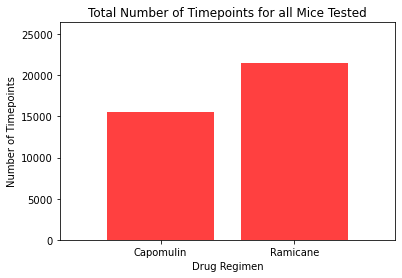

In [ ]:
drug_regimen_df = mice_agg.groupby(['Drug Regimen'], as_index=False).agg({
    'Timepoint Total':'sum'})

drug_regimen = drug_regimen_df['Drug Regimen']

# x_axis = [0 1] ... 0 is Capomulin 1 is Ramicane
x_axis = np.arange(len(drug_regimen))

# # y_axis is the timepoint values from 'drug_regimen_df' which is 0:15600 and 1:21450 
y_axis = drug_regimen_df['Timepoint Total']

plt.bar(x_axis, y_axis, color='r', alpha=0.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane"])

# Sets the x limits of the current chart
# len(x_axis) = 2...then 2 - 0.25 is 1.75  1.75 value is making sure the bar is not far away from center 
plt.xlim(-0.75, len(x_axis)- .25)

# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+5000)


# Give our chart some labels and a tile
plt.title("Total Number of Timepoints for all Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")


### Bar Chart: Total Number of Timepoints (tested mice) (pandas)

,Drug Regimen,Timepoint Total
0,Capomulin,15600
1,Ramicane,21450


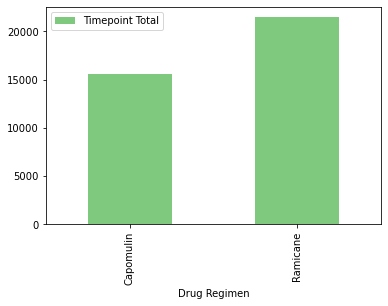

In [468]:
# create a pandas Bar plot
drug_regimen_df.plot(x ='Drug Regimen', y='Timepoint Total', kind='bar', cmap='Accent');

drug_regimen_df


### Pie Chart: Distribution of Female V. Male Mice (pyplot)

### Pie Chart: Distribution of Female V. Male Mice (Pandas)